In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import os, time, sys
import matplotlib.colors as mcolors
sns.set_style("whitegrid")

## Train models

In [6]:
import yaml
sys.path.insert(0,'../')
from train_baseline_ensemble import main_run as main_run_ensemble
from train_baseline_input import main_run as main_run_input
from train import main_run as main_run

storage_pd= pd.DataFrame()
columns_ = ["training_time", "prediction_time_full", "prediction_time_S2_S2VI_100", "prediction_time_S2_S2VI_S1_100", "prediction_time_S1_weather_DEM_100"]

In [7]:
with open(f"./config_time/baseline_inputTempD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_input(config_file)
storage_pd["ITempD-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_inputSensD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_input(config_file)
storage_pd["ISensD-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_featureSensD.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FSensD-cr"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_featureCoM.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoMl-co"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/baseline_ensemble.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run_ensemble(config_file)
storage_pd["ESensI-av"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

#---------------
with open(f"./config_time/com_average.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-av"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_gated.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-ga"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_cross.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-cr"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]

with open(f"./config_time/com_memory.yaml") as fd:
    config_file = yaml.load(fd, Loader=yaml.SafeLoader)
metadata_r = main_run(config_file)
storage_pd["FCoM-me"] = [np.mean(metadata_r[c])/3 if c =="training_time" else np.mean(metadata_r[c]) for c in columns_ ]


Normalize views
******************************** Executing model on run 1 and kfold 1
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 245592.58it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 444814.95it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mena/Documents/repos/com-views/config_time/aux/run-saves/checkpoint_logs/cropharvest_multi_train/PoolSensInv-Mena

Training with 19761 samples and validating on 9881
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([ 1.3325, -0.2590, -0.8400, -1.7024, -1.1267, -0.0247, -1.2784,  0.6541,
         0.4985, -0.0582,  1.1186, -0.3661, -0.8074,  0.1146,  0.7372,  0.7669,
        -0.0803, -0.2333, -0.4196,  0.9986, -2.0738,  0.0986,  0.4832,  0.7115,
        -1.0505, -0.6731,  0.4901, -1.5216,  0.0039, -1.5009, -0.1992,  1.2699,
        -0.0088,  0.9683,  0.1394,  0.2392, -1.6078, -0.3918,  0.4495, -1.1314,
         2.7970, -0.2726,  0.8864,  1.4944,  1.2593,  0.3817, -0.1979, -0.8518,
        -0.7869, -1.7923,  0.1052,  1.2017,  1.0640,  1.0501, -0.9623,  0.0507,
         2.6104,  1.7123,  0.3149, -0.8531,  0.6350,  0.3496,  0.8599, -1.4347,
         0.0076, -0.0669, -0.0451,  0.3123,  0.2332,  1.5139, -1.2454,  0.4291,
         0.0340, -0.6224,  0.5845,  0.3064,  0.2414, -0.0062,  1.5589,  1.2695,
        -1.03

Metric val_objective improved. New best score: 6.700


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 57.33it/s, v_num=8, train_objective=6.750, train_lossS1=1.550, train_lossweather=1.500, train_lossDEM=2.440, train_lossS2_S2VI=1.280]

Metric val_objective improved by 0.115 >= min_delta = 0.04. New best score: 6.586


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 55.09it/s, v_num=8, train_objective=5.610, train_lossS1=1.180, train_lossweather=1.450, train_lossDEM=2.110, train_lossS2_S2VI=0.872]

Metric val_objective improved by 0.147 >= min_delta = 0.04. New best score: 6.439
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 53.24it/s, v_num=8, train_objective=5.610, train_lossS1=1.180, train_lossweather=1.450, train_lossDEM=2.110, train_lossS2_S2VI=0.872]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 1/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S1_weather_DEM finished...
Fold 1/3 of Run 1/1 in PoolSensInv-MenaSensei finished...
******************************** Executing model on run 1 and kfold 2
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
firs

100%|██████████| 29642/29642 [00:00<00:00, 261011.40it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 487539.94it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mena/Documents/repos/com-views/config_time/aux/run-saves/checkpoint_logs/cropharvest_multi_train/PoolSensInv-Mena

Training with 19761 samples and validating on 9881
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([ 0.7949, -0.3226,  1.5613, -1.5886, -0.9224,  1.4470,  0.2314,  1.5020,
        -0.2812,  0.6348,  0.9415, -0.7679,  1.4227,  3.2969, -0.9098,  0.8577,
        -0.1776, -0.6927, -0.0855, -0.1081,  0.9226,  0.6419,  1.5363,  1.0390,
         0.2287, -0.1268, -1.2047, -1.2649,  0.5641,  1.4575,  1.4402,  0.2739,
         0.6569, -0.9259,  0.1042, -1.5232, -0.9422, -1.8860, -1.0632,  0.2621,
         1.3489,  0.8837,  1.0317,  0.1041,  0.4041,  0.0427,  0.0457, -1.1797,
        -1.7140,  0.4351, -0.0039,  0.4855, -0.8388,  0.4271,  0.0812,  1.3511,
        -0.2130,  1.6892, -0.8776, -0.6872,  0.1601, -1.5005, -1.7847,  1.4198,
         0.2478, -0.4565, -0.8023,  0.1535,  0.2029, -0.6487,  0.5220, -0.1943,
         1.1327,  0.4514, -0.5656,  0.1215, -0.6772,  0.3236, -1.4261, -1.6264,
         0.66

Metric val_objective improved. New best score: 6.762


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 54.89it/s, v_num=9, train_objective=7.360, train_lossS1=1.610, train_lossweather=2.050, train_lossDEM=2.380, train_lossS2_S2VI=1.320]

Metric val_objective improved by 0.191 >= min_delta = 0.04. New best score: 6.571


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 52.80it/s, v_num=9, train_objective=5.980, train_lossS1=1.550, train_lossweather=1.640, train_lossDEM=2.000, train_lossS2_S2VI=0.783]

Metric val_objective improved by 0.267 >= min_delta = 0.04. New best score: 6.303
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:03<00:00, 51.25it/s, v_num=9, train_objective=5.980, train_lossS1=1.550, train_lossweather=1.640, train_lossDEM=2.000, train_lossS2_S2VI=0.783]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 2/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S1_weather_DEM finished...
Fold 2/3 of Run 1/1 in PoolSensInv-MenaSensei finished...
******************************** Executing model on run 1 and kfold 3
You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
firs

100%|██████████| 29642/29642 [00:00<00:00, 252449.43it/s]


You select 5 views from the 8 available, you could use get_view_names() to check which are available, the selected views are ['S1', 'weather', 'DEM', 'S2', 'S2VI'], with additional views ['S2_S2VI']
first dimension of list will be the views, instead of the standard of n-samples


100%|██████████| 29642/29642 [00:00<00:00, 462206.57it/s]
/home/mena/Documents/repos/com-views/src/datasets/views_loader.py:8: RuntimeWarning: divide by zero encountered in remainder
  if v % int(v) == 0:
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/mena/miniconda3/envs/views2/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /home/mena/Documents/repos/com-views/config_time/aux/run-saves/checkpoint_logs/cropharvest_multi_train/PoolSensInv-Mena

Training with 19762 samples and validating on 9880
int64 [0 0 0 ... 9 9 9]
Initial parameters of model: "awareness_merge":       sum
"awareness_vectors":     {'S1': Parameter containing:
tensor([-1.2043, -0.1785, -0.9049, -0.7411, -0.8123, -0.9005,  0.7312,  0.3071,
         0.0321, -0.0079, -0.4453, -1.7041, -1.7227, -0.0955,  0.0080, -0.5289,
         1.2052,  1.0691,  0.0442,  0.6459, -1.2149,  0.5254, -1.7159,  0.8040,
        -0.8857, -0.3321, -2.6119,  0.1997,  0.2613,  0.9988,  0.4893, -0.1979,
         1.2648,  1.2420, -1.1245,  1.0161,  1.8677,  1.1118, -1.1471,  0.0340,
         1.7090,  0.7037,  0.9880, -0.3134,  0.7013,  0.8747,  1.8392,  0.3182,
         0.2122,  0.2015,  0.7602,  0.7435, -2.2921, -2.0386, -0.8598,  0.4836,
        -0.3007, -0.3501, -0.3666, -0.2101, -1.1994,  0.2904,  0.1962,  1.9108,
        -0.2826, -0.4446,  0.0045, -2.0556, -0.6153, -0.5625, -0.8021,  1.4965,
         0.3097,  0.8752,  0.5997,  1.4408, -1.9107,  1.8767, -2.0066, -0.2797,
        -0.04

Metric val_objective improved. New best score: 7.079


Epoch 1: 100%|██████████| 155/155 [00:02<00:00, 58.80it/s, v_num=10, train_objective=5.850, train_lossS1=1.330, train_lossweather=1.500, train_lossDEM=2.200, train_lossS2_S2VI=0.823]

Metric val_objective improved by 0.344 >= min_delta = 0.04. New best score: 6.735


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 60.16it/s, v_num=10, train_objective=6.570, train_lossS1=1.610, train_lossweather=1.700, train_lossDEM=2.270, train_lossS2_S2VI=0.986]

Metric val_objective improved by 0.545 >= min_delta = 0.04. New best score: 6.190
`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 155/155 [00:02<00:00, 54.56it/s, v_num=10, train_objective=6.570, train_lossS1=1.610, train_lossweather=1.700, train_lossDEM=2.270, train_lossS2_S2VI=0.986]
Training done
Inference with the following views  ['S2_S2VI']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI finished...
Inference with the following views  ['S2_S2VI', 'S1']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S2_S2VI_S1 finished...
Inference with the following views  ['S1', 'weather', 'DEM']  and percentage missing  1.0
Fold 3/3 of Run 1/1 in PoolSensInv-MenaSensei-Forw_S1_weather_DEM finished...
Fold 3/3 of Run 1/1 in PoolSensInv-MenaSensei finished...
Epochs for PoolSensInv-MenaSensei runs on average for 0.00 epochs +- 0.000
Finished whole execution of 1 runs in 37.30 secs


In [11]:
storage_pd.index = columns_
storage_pd.to_csv(f"./config_time/time_comparison.csv")

## Plots

In [13]:
storage_pd = pd.read_csv(f"./config_time/time_comparison.csv", index_col=0).T
storage_pd

,training_time,prediction_time_full,prediction_time_S2_S2VI_100,prediction_time_S2_S2VI_S1_100,prediction_time_S1_weather_DEM_100
ESensI,1.899371,0.447029,0.429504,0.442987,0.453132


In [99]:
matplotlib.rc('font', **{"size":19})
args_matplot = {"mec" :"black", "ms": 17, "alpha":0.8, "lw":2}
colors = list(mcolors.TABLEAU_COLORS.values())
markers = ["o", "*", "X", "s", "H", "P"] #quizas P en lugar de s

x_encoders = ["gru","lstm", "tempcnn", "tae", "ltae"]
x_ticks_encoders= ["GRU", "LSTM", "TempCNN", "TAE", "L-TAE"]

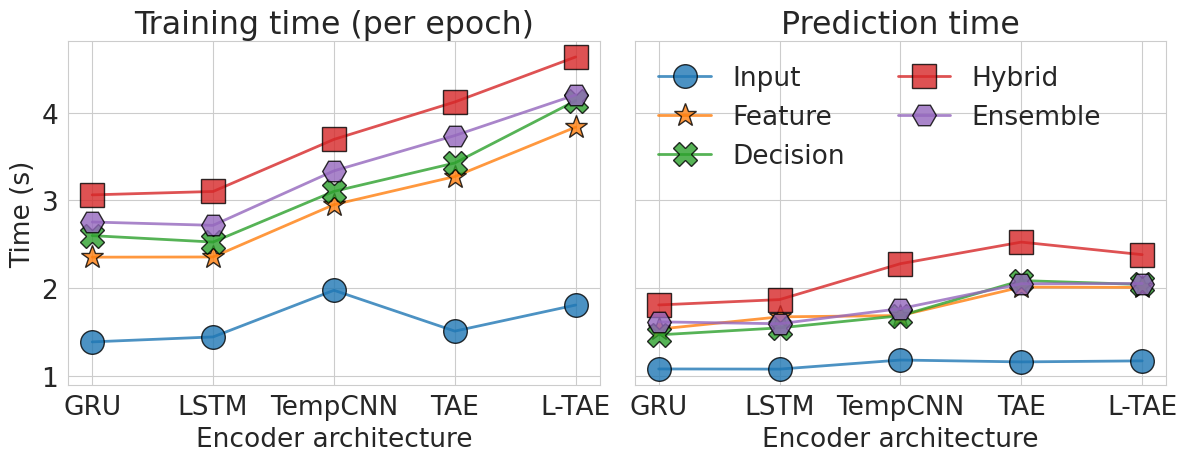

In [102]:
fig, ax = plt.subplots(1,2 ,squeeze=True, figsize=(12.5, 5), sharey=True)

for i, fusion in enumerate(storage_pd):
#ax[0,0].axhline(no_missing[CLAS_METRIC].values[0], lw=3, ls="--", c=colors[0], label="No Ratio", **args_matplot)
    ax[0].plot(x_ticks_encoders, storage_pd[fusion]["training_time"][x_encoders], c=colors[i],marker=markers[i], ls="-",label=fusion,
        **args_matplot)
    ax[0].set_xlabel("Encoder architecture")
    ax[0].set_ylabel("Time (s)")
    ax[0].set_xticks(np.arange(len(x_ticks_encoders)))
    ax[0].set_title("Training time (per epoch)")
    
    ax[1].plot(x_ticks_encoders, storage_pd[fusion]["prediction_time"][x_encoders], c=colors[i],marker=markers[i], ls="-", label=fusion,
        **args_matplot)
    ax[1].set_xlabel("Encoder architecture")
    ax[1].set_title("Prediction time")
    ax[1].legend(loc="upper left", framealpha=0., ncols=2)


fig.tight_layout(w_pad=0.4)
plt.savefig("imgs/time_comparison.pdf", bbox_inches='tight')
plt.show()